In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
#from warnings import filterwarnings
#warnings.filterwarnings("ignore")

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
trn_images, valid_images, trn_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.3, random_state=2)

In [3]:
# Preprocessing of Image data converting int - decimal to reduce sapce. pixel max size - 255
trn_images = trn_images / 255.0
test_images = test_images / 255.0
valid_images = valid_images / 255.0

In [4]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape = [28,28]))
model1.add(keras.layers.Dense(300, activation="relu"))
model1.add(keras.layers.Dense(10, activation="softmax"))

In [5]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape = [28,28]))
model2.add(keras.layers.Dense(300, activation="relu"))
model2.add(keras.layers.Dense(10, activation="softmax"))

In [6]:
model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"]) # loss fun sparse use kiya bcoz it is image data. 

model2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
                          

In [7]:
history = model1.fit(trn_images, trn_labels, epochs=50, validation_data=(valid_images, valid_labels))

Epoch 1/50
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5145 - accuracy: 0.8184 - val_loss: 0.4219 - val_accuracy: 0.8473
Epoch 2/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3826 - accuracy: 0.8600 - val_loss: 0.3650 - val_accuracy: 0.8717
Epoch 3/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3416 - accuracy: 0.8751 - val_loss: 0.3514 - val_accuracy: 0.8741
Epoch 4/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3143 - accuracy: 0.8848 - val_loss: 0.3297 - val_accuracy: 0.8834
Epoch 5/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2955 - accuracy: 0.8903 - val_loss: 0.3482 - val_accuracy: 0.8747
Epoch 6/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2774 - accuracy: 0.8967 - val_loss: 0.3299 - val_accuracy: 0.8818
Epoch 7/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2632 - accuracy: 0.9010 - val_loss: 0.3143 - val_accuracy:

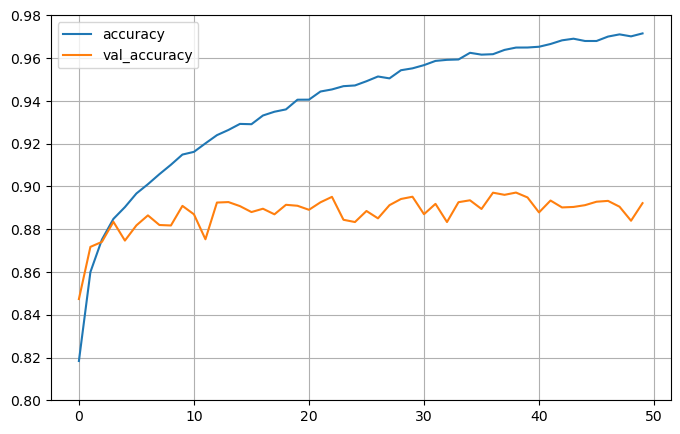

In [8]:
df = pd.DataFrame(history.history)
ind=[1,3]
df.iloc[:,ind].plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.8, 0.98) # set the vertical range to [0.5-1]
plt.show()

In [9]:
callback = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
history1 = model2.fit(trn_images, trn_labels, epochs=50, validation_data=(valid_images, valid_labels), callbacks=[callback])                      

Epoch 1/50
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5124 - accuracy: 0.8177 - val_loss: 0.3976 - val_accuracy: 0.8538
Epoch 2/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3798 - accuracy: 0.8623 - val_loss: 0.3755 - val_accuracy: 0.8626
Epoch 3/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3422 - accuracy: 0.8747 - val_loss: 0.3727 - val_accuracy: 0.8662
Epoch 4/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3158 - accuracy: 0.8824 - val_loss: 0.3462 - val_accuracy: 0.8751
Epoch 5/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2957 - accuracy: 0.8910 - val_loss: 0.3534 - val_accuracy: 0.8733
Epoch 6/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2787 - accuracy: 0.8963 - val_loss: 0.3261 - val_accuracy: 0.8819
Epoch 7/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2653 - accuracy: 0.9015 - val_loss: 0.3381 - val_accuracy:

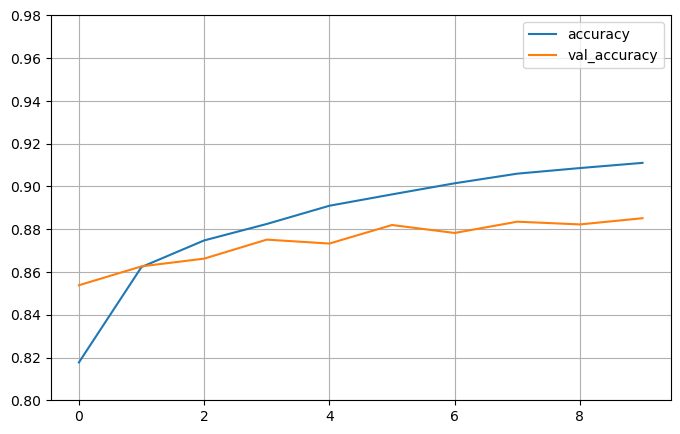

In [10]:
df = pd.DataFrame(history1.history)
ind=[1,3]
df.iloc[:,ind].plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.8, 0.98) # set the vertical range to [0.5-1]
plt.show()

In [11]:
model2.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 875us/step - loss: 0.3544 - accuracy: 0.8761


[0.3544459044933319, 0.8761000037193298]